In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None

In [2]:
# Parameters
product = {"nb": "/Users/macpro/Documents/GitHub/soZCqCfU4mL5ppCX/notebooks/visualize.ipynb"}


In [3]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
def num_customers_category(con, query_str, colums):

    """
    
    This function performs a query: Number of customers by job category then plots the result and saves the plot as a PNG file.
    
    Args:
        con (duckdb.Connection): DuckDB connection
        query_str (str): SQL query string
        colums (list): List of column names
        
    Returns:
        df_jobs (pandas.DataFrame): DataFrame containing the result of the query

    """

    # Execute the query
    df_jobs = con.execute(query_str).fetchall()
    df_jobs = pd.DataFrame(df_jobs, columns=colums)

    return df_jobs

In [5]:
def plot_bar_query(df_jobs, x, y, title, filename, hue=None):

    """

    This function plots the result of a query and saves the plot as a PNG file.

    Args:
        df_jobs (pandas.DataFrame): DataFrame containing the result of the query
        x (str): Name of the column to be used as x-axis
        y (str): Name of the column to be used as y-axis
        title (str): Title of the plot
        filename (str): Name of the file to be saved

    """

    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=x, y=y, data=df_jobs, hue=hue)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    
    # Save the plot
    plt.savefig(os.path.abspath(os.path.join(os.getcwd(), 'reports', 'figures', filename)))

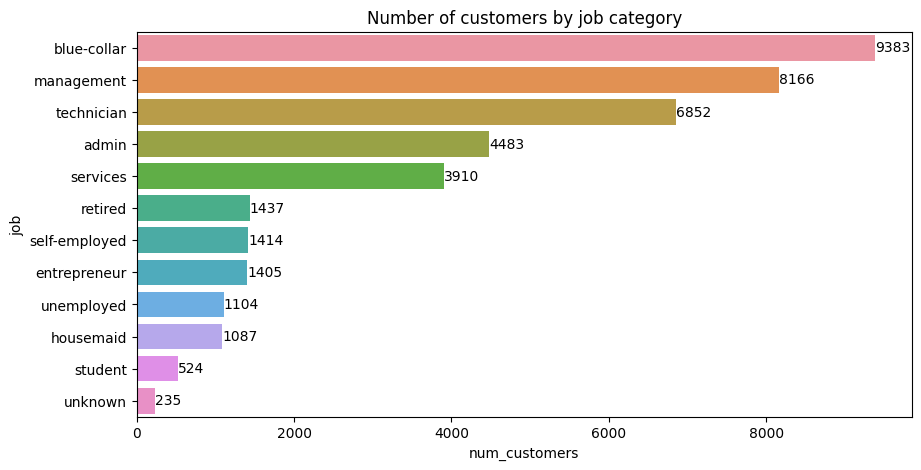

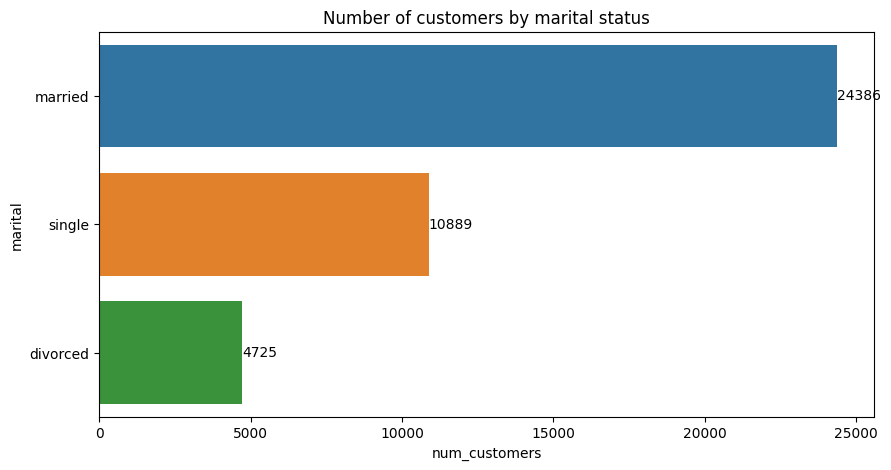

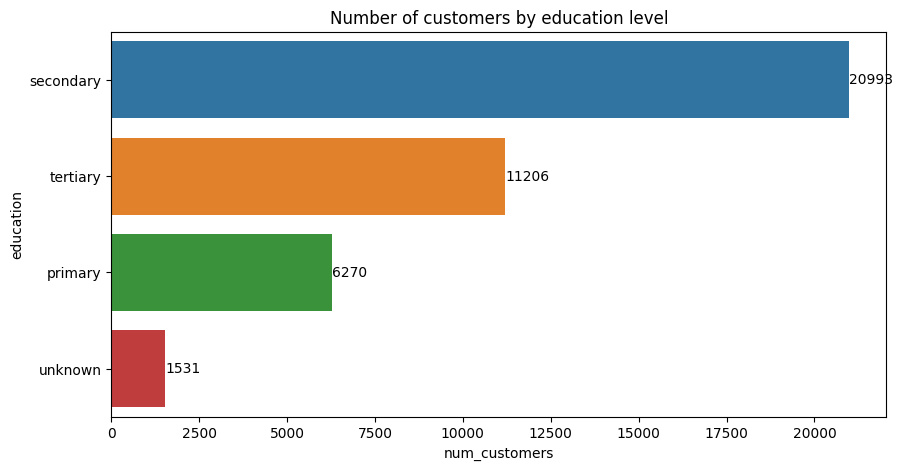

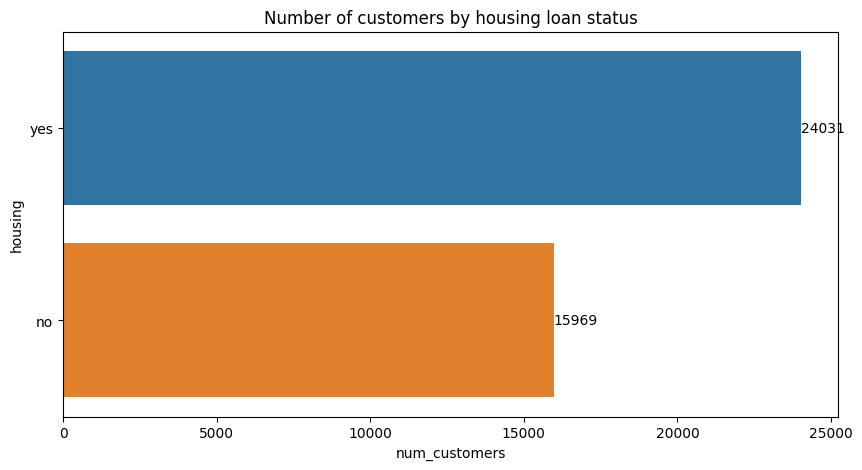

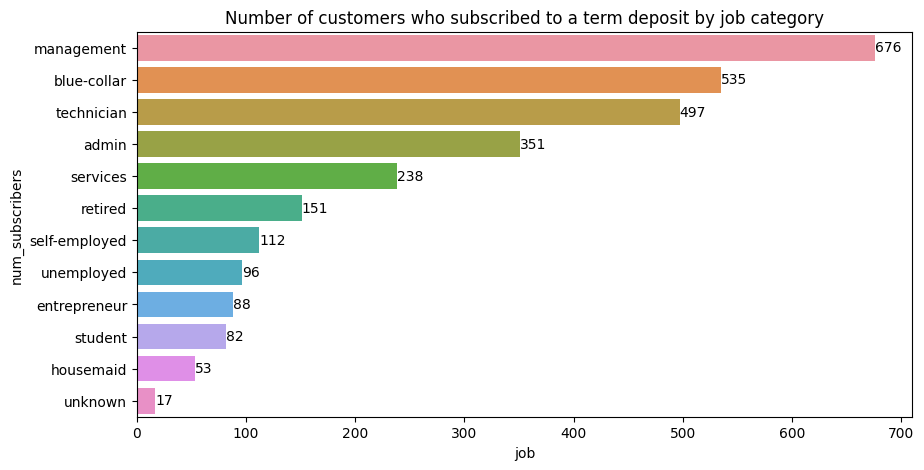

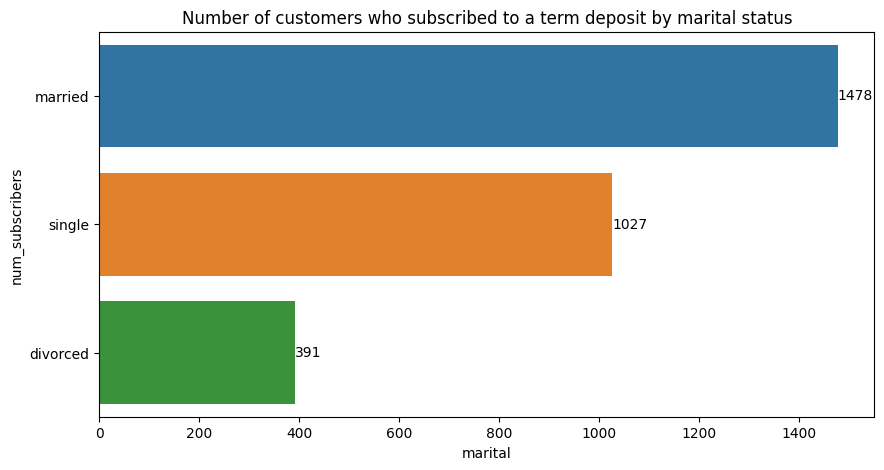

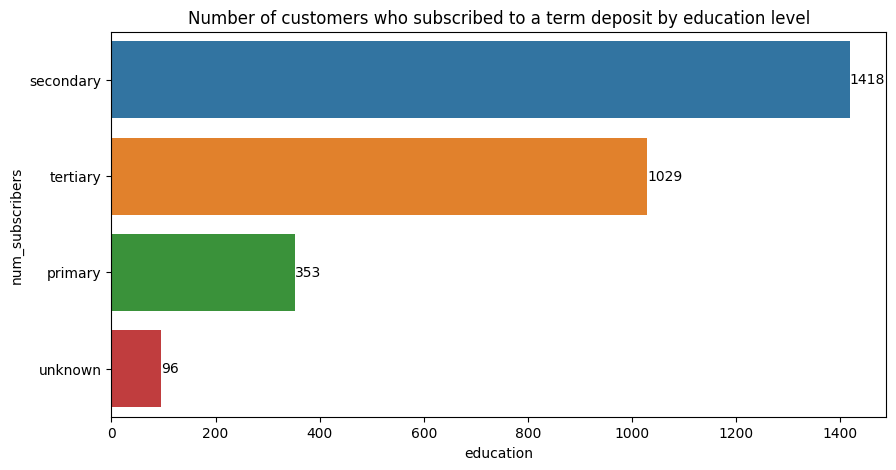

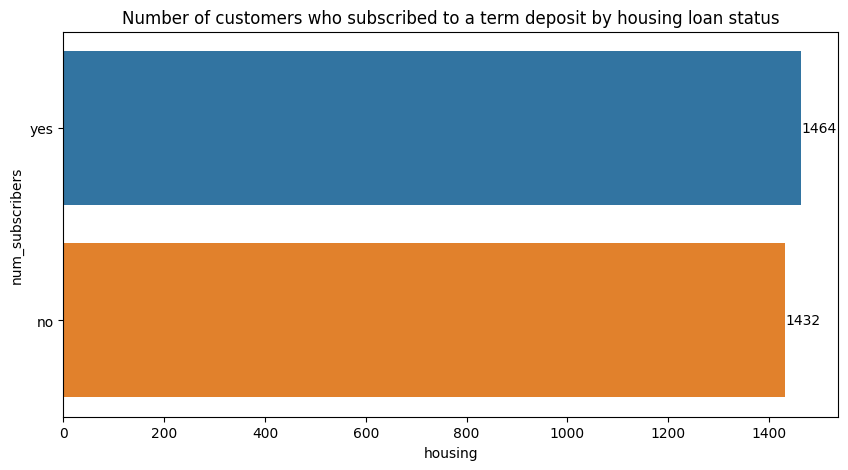

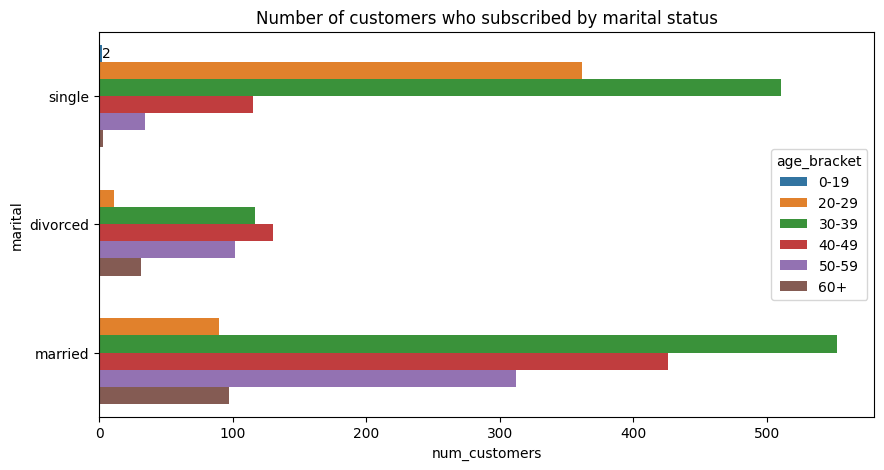

In [6]:
if __name__=="__main__":

    # Set the path to the CSV file
    csv_path = os.path.abspath(os.path.join(os.getcwd(), 'data', 'raw', 'term-deposit-marketing-2020.csv'))

    # Read the CSV file using pandas
    data = pd.read_csv(csv_path)

    # Create an in-memory DuckDB connection
    con = duckdb.connect(database=':memory:', read_only=False)

    # Register the pandas DataFrame as a DuckDB table
    con.register('term_deposit_marketing', data)

    # Q1 Find the total number of customers in each job category
    # Execute the query
    q_jobs = """
        SELECT job, COUNT(*) as num_customers
        FROM term_deposit_marketing
        GROUP BY job
        ORDER BY num_customers DESC;
        """
    
    # Execute the query
    df_jobs = num_customers_category(con, q_jobs, ['job', 'num_customers'])

    # Plot the result
    plot_bar_query(df_jobs,  'num_customers', 'job','Number of customers by job category', 'num_customers_job.png')

    # Q2 Find the total number of customers in each marital status
    # Form the query
    q_marital = """
        SELECT marital, COUNT(*) as num_customers
        FROM term_deposit_marketing
        GROUP BY marital
        ORDER BY num_customers DESC;
        """
    
    # Execute the query
    df_marital = num_customers_category(con, q_marital, ['marital', 'num_customers'])

    # Plot the result
    plot_bar_query(df_marital,  'num_customers', 'marital','Number of customers by marital status', 'num_customers_marital.png')

    # Q3 Find the total number of customers in each education level
    # Form the query
    q_education = """
        SELECT education, COUNT(*) as num_customers
        FROM term_deposit_marketing
        GROUP BY education
        ORDER BY num_customers DESC;
        """
    
    # Execute the query
    df_education = num_customers_category(con, q_education, ['education', 'num_customers'])

    # Plot the result
    plot_bar_query(df_education,  'num_customers', 'education','Number of customers by education level', 'num_customers_education.png')

    # Q4 Find the total number of customers in each housing loan status
    # Form the query
    q_housing = """
        SELECT housing, COUNT(*) as num_customers
        FROM term_deposit_marketing
        GROUP BY housing
        ORDER BY num_customers DESC;
        """
    
    # Execute the query
    df_housing = num_customers_category(con, q_housing, ['housing', 'num_customers'])

    # Plot the result
    plot_bar_query(df_housing,  'num_customers', 'housing','Number of customers by housing loan status', 'num_customers_housing.png')

    # Q5 Find the number of customers who subscribed to a term deposit (y = 'yes') by job category:
    # Form the query
    q_subscribed = """
        SELECT job, COUNT(*) as num_subscribers
        FROM term_deposit_marketing
        WHERE y = 'yes'
        GROUP BY job
        ORDER BY num_subscribers DESC;
        """
    
    # Execute the query
    df_subscribed = num_customers_category(con, q_subscribed, ['num_subscribers', 'job'])

    # Plot the result
    plot_bar_query(df_subscribed, 'job','num_subscribers', 'Number of customers who subscribed to a term deposit by job category', 'num_subscribers_job.png')

    # Q6 Find the number of customers who subscribed to a term deposit (y = 'yes') by marital status:
    # Form the query
    q_subscribedm = """
        SELECT marital, COUNT(*) as num_subscribers
        FROM term_deposit_marketing
        WHERE y = 'yes'
        GROUP BY marital
        ORDER BY num_subscribers DESC;
        """
    
    # Execute the query
    df_subscribedm = num_customers_category(con, q_subscribedm, ['num_subscribers', 'marital'])

    # Plot the result
    plot_bar_query(df_subscribedm, 'marital','num_subscribers', 'Number of customers who subscribed to a term deposit by marital status', 'num_subscribers_marital.png')

    # Q7 Find the number of customers who subscribed to a term deposit (y = 'yes') by education level:
    # Form the query
    q_subscribede = """
        SELECT education, COUNT(*) as num_subscribers
        FROM term_deposit_marketing
        WHERE y = 'yes'
        GROUP BY education
        ORDER BY num_subscribers DESC;
        """
    
    # Execute the query
    df_subscribede = num_customers_category(con, q_subscribede, ['num_subscribers', 'education'])

    # Plot the result
    plot_bar_query(df_subscribede, 'education','num_subscribers', 'Number of customers who subscribed to a term deposit by education level', 'num_subscribers_education.png')

    # Q8 Find the number of customers who subscribed to a term deposit (y = 'yes') by housing loan status:
    # Form the query
    q_subscribedh = """
        SELECT housing, COUNT(*) as num_subscribers
        FROM term_deposit_marketing
        WHERE y = 'yes'
        GROUP BY housing
        ORDER BY num_subscribers DESC;
        """
    
    # Execute the query
    df_subscribedh = num_customers_category(con, q_subscribedh, ['num_subscribers', 'housing'])

    # Plot the result
    plot_bar_query(df_subscribedh, 'housing','num_subscribers', 'Number of customers who subscribed to a term deposit by housing loan status', 'num_subscribers_housing.png')

    # Q9 Find the number of customers who subscribed to a term deposit (y = 'yes') by age bracket and marital status:
    age_bracket_q = """
                SELECT 
                    CASE
                        WHEN age BETWEEN 0 AND 19 THEN '0-19'
                        WHEN age BETWEEN 20 AND 29 THEN '20-29'
                        WHEN age BETWEEN 30 AND 39 THEN '30-39'
                        WHEN age BETWEEN 40 AND 49 THEN '40-49'
                        WHEN age BETWEEN 50 AND 59 THEN '50-59'
                        ELSE '60+'
                    END as age_bracket,
                    marital,
                    COUNT(*) as num_customers
                FROM term_deposit_marketing
                WHERE y = 'yes'
                GROUP BY age_bracket, marital
                ORDER BY age_bracket, marital;
                """
    
    # Execute the query
    df_age_bracket = num_customers_category(con, age_bracket_q, ['age_bracket', 'marital', 'num_customers'])

    # Plot the result
    plot_bar_query(df_age_bracket,  'num_customers', 'marital','Number of customers who subscribed by marital status', 'num_customers_m_bracket.png', hue='age_bracket')

    # Close the connection
    con.close()